In [ ]:
'''Project steps
1. Collect fake face dataset.
    - https://www.kaggle.com/competitions/deepfake-detection-challenge/discussion/121173 contains 1 million fake faces.
    - used  a subset of this list which contains about 140000 fake faces, https://www.kaggle.com/datasets/tunguz/1-million-fake-faces-7
    - from this will select about 10000 images to use for the project

2. Collect real face dataset.
    - https://www.kaggle.com/c/deepfake-detection-challenge/discussion/122786
    - used a subset of this list https://www.kaggle.com/datasets/xhlulu/flickrfaceshq-dataset-nvidia-part-9
    - contains a little more than 7000 images, but they are all grouped across multiple folders and subfolders, so I will need to combine them into one folder

3. The dataset was downloaded to my local machine. Here I will scale down, then categorize real faces and fake faces into their own folders.
  - After evaluating the dataset, I decided that the file sizes were too large for my machine to work with, so I will decrease the file size.
  - Also will move the model training to colab to utilize its GPU or TPU

4. Scaling
    - initially I tried 224x224 but I questioned the impacted this would have on the model then opted for a slightly larger image file of 256x256
    - there is significant detail loss at 224x224 resolution, and less detail loss at 256x256
    - Pitfall : I do worry about the impact decreasing image quality will have on the model

4. Create a new directory with a resize of all images in one folder

**
After the codes ran, and all images where placed in their proper folders,
I commented the code out so that I would not accidentally run it again and overwrite the images.
I have left the codes available for evaluation
**

5. Transfer to Google Drive, then mount Google Drive to Colab.

6. Review sample images from each category.
'''

In [ ]:
''' The following is the codes I used to select images, resize, then put them into respective folders.
This was done on my local machine. Then the folders were updated into Google Drive.
I included here for evaluation purposes.
This may also be helpful for others in the learning process.

import numpy as np
import cv2
import os
import shutil

fake_faces_path = '/Users/zakir/DS_Projects/1m_faces_91__99/1m_faces_91'
output_for_fake_faces = '/Users/zakir/DS_Projects/1m_faces_91__99/1m_faces_91_resized'

#iterate through all the images in the folder
for filename in os.listdir(fake_faces_path):
    # 1. read the image
    img = cv2.imread(os.path.join(fake_faces_path,filename))
    # 2. resize the image
    img = cv2.resize(img, (256,256))
    # 3. save the image
    cv2.imwrite(os.path.join(output_for_fake_faces, filename), img)

#images for real faces were scattered through multiple folders with multiple levels
unorganized_real_faces_path = '/Users/zakir/DS_Projects/scattered_real_faces'
output_for_real_faces = '/Users/zakir/DS_Projects/real_faces_9'

#the code below will combine all the images from the subdirectories into one folder
for root, directories, files in os.walk(unorganized_real_faces_path, topdown=False):
    for file in files:
        if file.endswith('.png'):
            shutil.copy(os.path.join(root,file), out_put_for_real_faces)

output_resized_faces = '/Users/zakir/DS_Projects/real_faces_9_resized'

#resize real faces
for filename in os.listdir(real_faces_path):
    img = cv2.imread(os.path.join(output_for_real_faces, filename))
    img = cv2.resize(img, (256,256))
    cv2.imwrite(os.path.join(output_resized_faces, filename), img)

'''


In [18]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data_path = '/content/drive/MyDrive/RealVSFakeFace/'

In [21]:
real_face = data_path + 'real_faces/'
fake_face = data_path + 'fake_faces/'

In [12]:
import numpy as np
import cv2
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [13]:
#create a sample size to review
num_samples = 5

In [22]:
#get random samples of real faces
real_samples = random.sample(os.listdir(real_face), num_samples)

In [23]:
#get random samples of fake faces
fake_samples = random.sample(os.listdir(fake_face), num_samples)

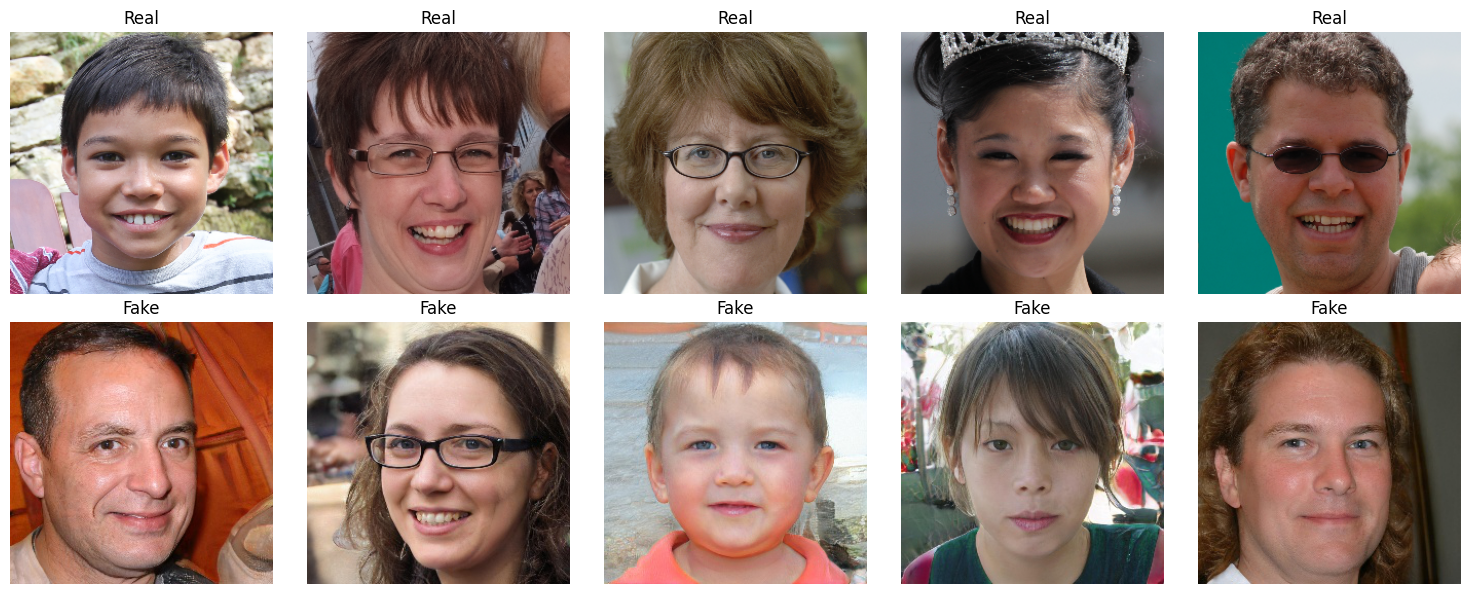

In [25]:
fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

#display the real face images
for i, image_file in enumerate(real_samples):
    image_path = os.path.join(real_face, image_file)
    image = mpimg.imread(image_path)
    axes[0, i].imshow(image)
    axes[0, i].axis('off')
    axes[0, i].set_title('Real')

# Display the fake face images
for i, image_file in enumerate(fake_samples):
    image_path = os.path.join(fake_face, image_file)
    image = mpimg.imread(image_path)
    axes[1, i].imshow(image)
    axes[1, i].axis('off')
    axes[1, i].set_title('Fake')

plt.tight_layout()
plt.show()
